# Import software libraries

In [417]:
# Import required libraries.
import sys                          # Read system parameters.
import numpy as np                  # Work with multi-dimensional arrays.
import pandas as pd                 # Manipulate and analyze data.
import matplotlib                   # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns               # Make charting easier.

# Summarize software libraries used.
print('Libraries used in this project:')
print('- NumPy {}'.format(np.__version__))
print('- Python {}'.format(sys.version))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))

Libraries used in this project:
- NumPy 1.19.2
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- pandas 1.1.3
- Matplotlib 3.3.2
- Seaborn 0.11.0


# Read and examine the data

In [418]:
# Read the data that was put through the ETL process in Course 2 of the CDSP Specialization. 
online_history_cleaned=pd.read_pickle('data/online_history_cleaned.pickle')


# Preview the first five rows of the data.
online_history_cleaned.head(5)

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Description
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,ASSORTED COLOUR BIRD ORNAMENT
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,LUNCH BAG RED RETROSPOT


In [419]:
# Get the shape of the data.
online_history_cleaned.shape

(15206, 9)

In [420]:
# Get the data types for every column in the DataFrame.

online_history_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15206 entries, 0 to 17031
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      15206 non-null  object        
 1   StockCode    15206 non-null  object        
 2   Quantity     15206 non-null  int64         
 3   InvoiceDate  15206 non-null  datetime64[ns]
 4   Price        15194 non-null  float64       
 5   CustomerID   12435 non-null  object        
 6   Country      15206 non-null  object        
 7   TotalAmount  15194 non-null  float64       
 8   Description  15206 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 1.2+ MB


# Generate summary statistics for all of the data

In [421]:
# Get a DataFrame of summary statistics that describe the data, including mean, median, standard deviation, etc.
# Be sure to include all variables, including categorical ones.
online_history_cleaned.describe(include='all')

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Description
count,15206,15206,15206.000000,15206,15194.000000,12435,15206,15194.000000,15206
unique,8315,10,NaN,8022,NaN,2473,1,NaN,10
top,536876,85123A,NaN,2011-05-10 15:07:00,NaN,u17841,United Kingdom,NaN,CREAM HANGING HEART T-LIGHT HOLDER
freq,10,2163,NaN,10,NaN,171,15206,NaN,2163
first,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2011-12-09 12:31:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.775483,NaN,4.164267,NaN,NaN,40.705153,NaN
std,NaN,NaN,79.496270,NaN,4.377605,NaN,NaN,132.142503,NaN
min,NaN,NaN,1.000000,NaN,0.400000,NaN,NaN,0.550000,NaN
25%,NaN,NaN,2.000000,NaN,1.650000,NaN,NaN,8.850000,NaN


# Plot a bar chart for the average price per item

In [422]:
online_history_cleaned['Description'].value_counts(dropna=True)

CREAM HANGING HEART T-LIGHT HOLDER    2163
JUMBO BAG RED RETROSPOT               1957
REGENCY CAKESTAND 3 TIER              1702
PARTY BUNTING                         1608
LUNCH BAG RED RETROSPOT               1409
ASSORTED COLOUR BIRD ORNAMENT         1392
POPCORN HOLDER                        1321
SET OF 3 CAKE TINS PANTRY DESIGN      1250
LUNCH BAG  BLACK SKULL.               1244
PACK OF 72 RETROSPOT CAKE CASES       1160
Name: Description, dtype: int64

Text(0.5, 1.0, 'Average Price Of Items')

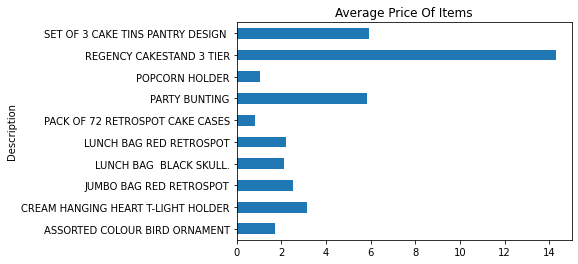

In [423]:
# Plot the average price per item using a bar chart.
# Make sure the average price is on one axis, and each distinct item description is on the other axis.
average_price_item=online_history_cleaned.groupby(['Description'])['Price'].mean()

#horizontal bar chart.
average_price_item.plot(kind='barh')
plt.title('Average Price Of Items')

# Explore the distribution of the numeric variable `Price`

In [424]:
# Get a DataFrame of summary statistics for numeric variables only.
online_history_cleaned_numeric=online_history_cleaned.describe()
online_history_cleaned_numeric

,Quantity,Price,TotalAmount
count,15206.000000,15194.000000,15194.000000
mean,16.775483,4.164267,40.705153
std,79.496270,4.377605,132.142503
min,1.000000,0.400000,0.550000
25%,2.000000,1.650000,8.850000
50%,6.000000,2.550000,16.500000
75%,12.000000,4.950000,30.360000
max,4300.000000,32.040000,4921.500000


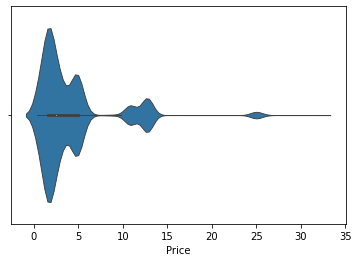

In [425]:
# Generate a violin plot for the "Price" variable.
sns.violinplot(x=online_history_cleaned.Price, linewidth=0.9);

# Decorate and style the plot however you think is best.



# Visualize correlations between numeric variables

In [426]:
# Generate a correlation matrix between all numeric variables.

corr_matrix=online_history_cleaned_numeric.corr()
corr_matrix

,Quantity,Price,TotalAmount
Quantity,1.000000,0.960772,0.999207
Price,0.960772,1.000000,0.948983
TotalAmount,0.999207,0.948983,1.000000


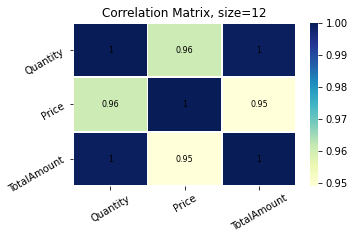

In [427]:
# Visualize the correlations with a heatmap.

fig=plt.figure(figsize=(5,3))

sns.heatmap(corr_matrix, cmap="YlGnBu",linewidth=0.75,\
linecolor='white',cbar=True,\
annot=True,annot_kws={'size':8, 'color':'black'})
plt.tick_params(labelsize=10, rotation=30)
plt.title('Correlation Matrix, size=12');

# Transform skewed variables

In [428]:
#this code checks the numeric columns in the cleaned data
numeric_columns = online_history_cleaned.select_dtypes(exclude=['object']).columns
numeric_columns

Index(['Quantity', 'InvoiceDate', 'Price', 'TotalAmount'], dtype='object')

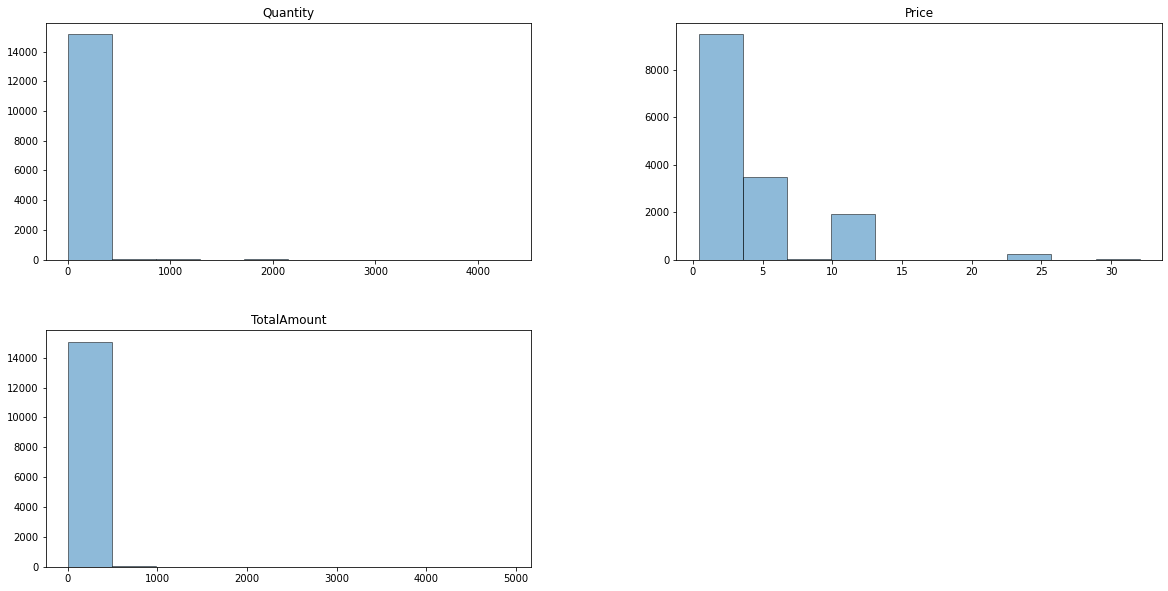

In [429]:
#Original histogram for Quantity, Price and TotalAmount
online_history_cleaned.select_dtypes(exclude=['bool', 'object']).hist(figsize=(20,10), alpha=0.5,
                     edgecolor='black', grid=False);

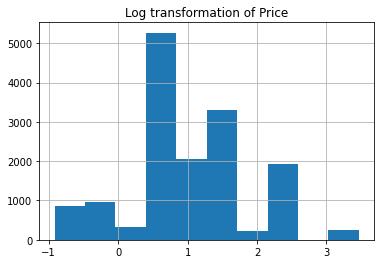

In [430]:
# Plot the log transformation of "Price".
np.log(online_history_cleaned['Price']).hist()
plt.title('Log transformation of Price');

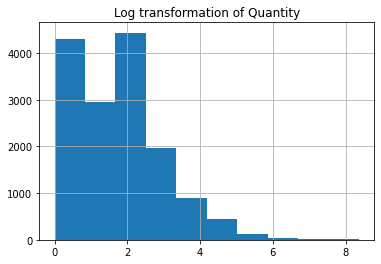

In [431]:
# Plot the log transformation of "Quantity".
np.log(online_history_cleaned['Quantity']).hist()
plt.title('Log transformation of Quantity');

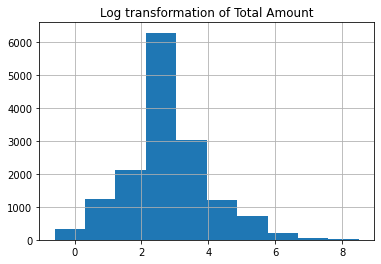

In [432]:
# Plot the log transformation of "TotalAmount".
np.log(online_history_cleaned['TotalAmount']).hist()
plt.title('Log transformation of Total Amount');

# Analyze time series data

In [433]:
# Obtain the number of invoices by month.
online_history_cleaned['invoice_month']=\
online_history_cleaned['InvoiceDate'].dt.month

# Print the number of invoices by month.

df_inv=online_history_cleaned.groupby(['invoice_month'])['Invoice'].count()
df_inv.to_frame()
df_inv.columns =['frequency']
df_inv

invoice_month
1      923
2      956
3     1345
4     1140
5     1384
6     1203
7     1227
8     1169
9     1378
10    1257
11    1726
12    1498
Name: Invoice, dtype: int64

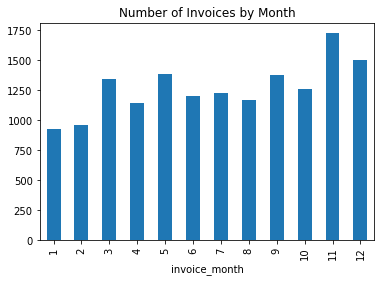

In [434]:
# Use a bar chart to plot the number of invoices by month.

df_inv.plot(kind='bar')
plt.title('Number of Invoices by Month');

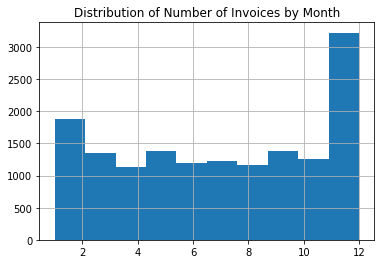

In [435]:
# View the distribution of data.
online_history_cleaned['invoice_month'].hist()
plt.title('Distribution of Number of Invoices by Month');

# Identify and handle missing data

In [436]:
# Identify any missing data for all variables.
online_history_cleaned.isnull().sum()

Invoice             0
StockCode           0
Quantity            0
InvoiceDate         0
Price              12
CustomerID       2771
Country             0
TotalAmount        12
Description         0
invoice_month       0
dtype: int64

In [437]:
# Print the current shape of the data.
print(online_history_cleaned.shape)

# Remove rows of data where "CustomerID" is unknown.

online_history_new= online_history_cleaned.\
drop(online_history_cleaned[online_history_cleaned.CustomerID.isnull()].index)

# Print the new shape of the data.
print(online_history_new.shape)

(15206, 10)
(12435, 10)


In [438]:
# Fill in N/A values for "Price" and "TotalAmount" with 0.

online_history_new['Price'].fillna(0, inplace=True)
online_history_new['TotalAmount'].fillna(0, inplace=True)

# Confirm there are no longer any missing values.
print(online_history_new.isnull().sum())

Invoice          0
StockCode        0
Quantity         0
InvoiceDate      0
Price            0
CustomerID       0
Country          0
TotalAmount      0
Description      0
invoice_month    0
dtype: int64


# One-hot encode the `Description` variable

In [439]:
# One-hot encode the "Description" variable with dummy variables for each unique description.
# Prefix each dummy variable name with "Description".

import category_encoders as ce                              # Encode data.

# Create object for one-hot encoding.
encoder=ce.OneHotEncoder(cols='Description',
                        return_df=True,
                        use_cat_names=True)

# Fit and transform data.

online_history_encoded=encoder.fit_transform(online_history_new)

# Preview the first five rows of the DataFrame.
online_history_encoded.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_ASSORTED COLOUR BIRD ORNAMENT,Description_LUNCH BAG RED RETROSPOT,Description_PACK OF 72 RETROSPOT CAKE CASES,Description_JUMBO BAG RED RETROSPOT,Description_POPCORN HOLDER,Description_LUNCH BAG BLACK SKULL.,Description_REGENCY CAKESTAND 3 TIER,Description_PARTY BUNTING,Description_SET OF 3 CAKE TINS PANTRY DESIGN,invoice_month
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,1,0,0,0,0,0,0,0,0,0,12
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,0,1,0,0,0,0,0,0,0,0,12
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,1,0,0,0,0,0,0,0,0,0,12
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,1,0,0,0,0,0,0,0,0,0,12
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,0,0,1,0,0,0,0,0,0,0,12


In [440]:
# Concatenate the new encoded columns with the main DataFrame.


online_history_encoded=\
pd.concat([online_history_new, online_history_encoded], axis=1)

# Drop the original "Description" variable.
online_history_encoded.drop(['Description'], axis=1, inplace=True)


In [441]:
# Preview the first five rows of the data.
online_history_encoded.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,invoice_month,Invoice,...,Description_ASSORTED COLOUR BIRD ORNAMENT,Description_LUNCH BAG RED RETROSPOT,Description_PACK OF 72 RETROSPOT CAKE CASES,Description_JUMBO BAG RED RETROSPOT,Description_POPCORN HOLDER,Description_LUNCH BAG BLACK SKULL.,Description_REGENCY CAKESTAND 3 TIER,Description_PARTY BUNTING,Description_SET OF 3 CAKE TINS PANTRY DESIGN,invoice_month
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,12,536365,...,0,0,0,0,0,0,0,0,0,12
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,12,536367,...,1,0,0,0,0,0,0,0,0,12
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,12,536373,...,0,0,0,0,0,0,0,0,0,12
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,12,536375,...,0,0,0,0,0,0,0,0,0,12
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,12,536378,...,0,1,0,0,0,0,0,0,0,12


# Identify and remove columns with low variance

In [442]:
# Obtain the standard deviation of each variable.
online_history_encoded.std()


Quantity                                           77.436253
Price                                               3.506381
TotalAmount                                       132.092738
invoice_month                                       3.379857
Quantity                                           77.436253
Price                                               3.506381
TotalAmount                                       132.092738
Description_CREAM HANGING HEART T-LIGHT HOLDER      0.362575
Description_ASSORTED COLOUR BIRD ORNAMENT           0.308044
Description_LUNCH BAG RED RETROSPOT                 0.288011
Description_PACK OF 72 RETROSPOT CAKE CASES         0.254417
Description_JUMBO BAG RED RETROSPOT                 0.322017
Description_POPCORN HOLDER                          0.267557
Description_LUNCH BAG  BLACK SKULL.                 0.274661
Description_REGENCY CAKESTAND 3 TIER                0.317766
Description_PARTY BUNTING                           0.306081
Description_SET OF 3 CAK

In [443]:
# Define a standard deviation threshold of 0.26.

threshold=0.26

# Identify any columns that are lower than the threshold.
cols_to_drop=\
list(online_history_encoded.std()\
[online_history_encoded.std()<threshold].index.values)


# Print the column(s) that will be dropped.
print("features with low standard deviation:",
     cols_to_drop)

features with low standard deviation: ['Description_PACK OF 72 RETROSPOT CAKE CASES']


In [444]:
# Drop the column(s) that have low standard deviation from the main dataset.
online_history_interim=online_history_encoded.drop(cols_to_drop, axis=1)


# Preview the first five rows of data.
online_history_interim


,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,invoice_month,Invoice,...,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_ASSORTED COLOUR BIRD ORNAMENT,Description_LUNCH BAG RED RETROSPOT,Description_JUMBO BAG RED RETROSPOT,Description_POPCORN HOLDER,Description_LUNCH BAG BLACK SKULL.,Description_REGENCY CAKESTAND 3 TIER,Description_PARTY BUNTING,Description_SET OF 3 CAKE TINS PANTRY DESIGN,invoice_month
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,12,536365,...,1,0,0,0,0,0,0,0,0,12
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,12,536367,...,0,1,0,0,0,0,0,0,0,12
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,12,536373,...,1,0,0,0,0,0,0,0,0,12
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,12,536375,...,1,0,0,0,0,0,0,0,0,12
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,12,536378,...,0,0,1,0,0,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17027,581538,20727,1,2011-12-09 11:34:00,1.65,u14446,United Kingdom,1.65,12,581538,...,0,0,0,0,0,1,0,0,0,12
17028,581538,20725,1,2011-12-09 11:34:00,1.65,u14446,United Kingdom,1.65,12,581538,...,0,0,1,0,0,0,0,0,0,12
17029,581579,22197,24,2011-12-09 12:19:00,0.85,u17581,United Kingdom,20.40,12,581579,...,0,0,0,0,1,0,0,0,0,12
17030,581583,20725,40,2011-12-09 12:23:00,1.45,u13777,United Kingdom,58.00,12,581583,...,0,0,1,0,0,0,0,0,0,12


# Generate box plots for each numeric variable

In [445]:
online_history_interim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12435 entries, 0 to 17031
Data columns (total 27 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Invoice                                         12435 non-null  object        
 1   StockCode                                       12435 non-null  object        
 2   Quantity                                        12435 non-null  int64         
 3   InvoiceDate                                     12435 non-null  datetime64[ns]
 4   Price                                           12435 non-null  float64       
 5   CustomerID                                      12435 non-null  object        
 6   Country                                         12435 non-null  object        
 7   TotalAmount                                     12435 non-null  float64       
 8   invoice_month                                 

In [446]:
#removing duplicated columns while concatenate
online_history_interim = online_history_interim.loc[:,~online_history_interim.columns.duplicated()].copy()
online_history_interim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12435 entries, 0 to 17031
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype         
---  ------                                          --------------  -----         
 0   Invoice                                         12435 non-null  object        
 1   StockCode                                       12435 non-null  object        
 2   Quantity                                        12435 non-null  int64         
 3   InvoiceDate                                     12435 non-null  datetime64[ns]
 4   Price                                           12435 non-null  float64       
 5   CustomerID                                      12435 non-null  object        
 6   Country                                         12435 non-null  object        
 7   TotalAmount                                     12435 non-null  float64       
 8   invoice_month                                 

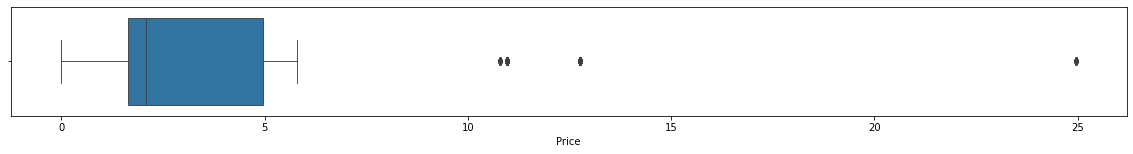

In [447]:
# Draw box plots for each numeric variable.

#box plots for Price.

plt.figure(figsize=(20,2))
sns.boxplot(x=online_history_interim['Price'], linewidth=0.9);

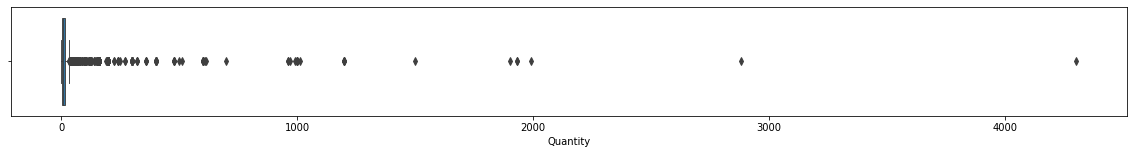

In [448]:
#box plots for Quantity

plt.figure(figsize=(20,2))
sns.boxplot(x=online_history_interim['Quantity'], linewidth=0.9);

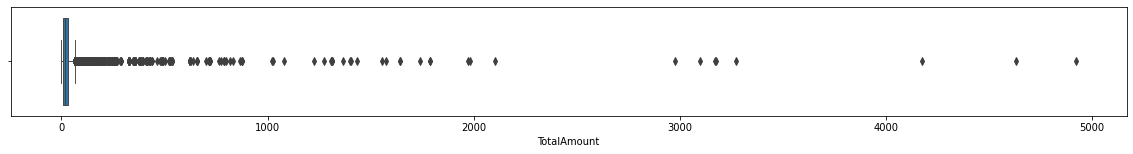

In [449]:
#box plots for TotalAmount

plt.figure(figsize=(20,2))
sns.boxplot(x=online_history_interim['TotalAmount'], linewidth=0.9);

# Identify and remove outliers

In [450]:
# This function returns the lower and upper bounds of a numeric input variable.

def calc_outliers(var):
    q3 = np.percentile(var, 75) 
    q1 = np.percentile(var, 25)

    iqr = 1.5 * (q3 - q1)

    lb = q1 - iqr
    ub = q3 + iqr

    print('Lower bound of outliers:', round(lb, 2), '\nUpper bound of outliers:', round(ub, 2))
    
    return lb, ub

In [451]:
# Identify the shape of the data before removing outliers.
online_history_interim.shape

(12435, 18)

In [452]:
# Call the calc_outliers() function iteratively for each numeric variable.
price_lb_ub=calc_outliers(online_history_interim['Price'])
quantity_lb_ub=calc_outliers(online_history_interim['Quantity'])
totalamount_lb_ub=calc_outliers(online_history_interim['TotalAmount'])

Lower bound of outliers: -3.3 
Upper bound of outliers: 9.9
Lower bound of outliers: -15.0 
Upper bound of outliers: 33.0
Lower bound of outliers: -23.8 
Upper bound of outliers: 66.07


In [453]:
# For each variable:
# Remove the outliers that are higher than the upper bounds.

online_history_updated=\
online_history_interim[(online_history_interim['Price']>=(-3.3)) &\
(online_history_interim['Price']<=9.9)]

print("The shape of Dataframe after removing Price outliers are:",
      online_history_updated.shape)

online_history_updated=\
online_history_interim[(online_history_interim['Quantity']>=(-15.0)) &\
(online_history_interim['Price']<=33)]

print("The shape of Dataframe after removing Quantity outliers are:",
      online_history_updated.shape)

online_history_updated=\
online_history_interim[(online_history_interim['TotalAmount']>=(-23.8)) &\
(online_history_interim['Price']<=66.07)]

print("The shape of Dataframe after removing TotalAmount outliers are:",
      online_history_updated.shape)


# Remove the variables that are lower than the lower bounds.
# As you iterate through each variable, print the shape of the data after the outliers for that variable are removed.

The shape of Dataframe after removing Price outliers are: (11010, 18)
The shape of Dataframe after removing Quantity outliers are: (12435, 18)
The shape of Dataframe after removing TotalAmount outliers are: (12435, 18)


# Save the final dataset as a pickle file

In [454]:
# Save the final dataset as a pickle file named online_history_cleaned_final.pickle.
online_history_updated.to_pickle('online_history_updated.pickle')